# CS146 Location-Based Assignment 

## Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("CS146_LBA_data.csv")

### Some information on variables (data types, count) in our dataset is below:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 68 columns):
Timestamp                                                            50 non-null object
Email Address                                                        50 non-null object
Your name                                                            50 non-null object
Country where you (and the grocery store) are                        50 non-null object
Currency (e.g. EUR, GBP, USD)                                        50 non-null object
Grocery store name and street address (or URL if shopping online)    50 non-null object
Price perception of the store brand                                  50 non-null object
Average rental price near the grocery store                          50 non-null object
Product 1 quantity (kg)                                              50 non-null float64
Product 1 price                                                      50 non-null float64
Product 2 quant

### What's in our data? Let's clean it up! 
#### Deleting timestamps, email addresses, names of students, grocery store addresses for an easier data manipulation.

In [4]:
data.head()

,Timestamp,Email Address,Your name,Country where you (and the grocery store) are,"Currency (e.g. EUR, GBP, USD)",Grocery store name and street address (or URL if shopping online),Price perception of the store brand,Average rental price near the grocery store,Product 1 quantity (kg),Product 1 price,...,Product 2 quantity (count),Product 2 price.8,Product 3 quantity (count),Product 3 price.8,Product 1 quantity (kg).7,Product 1 price.9,Product 2 quantity (kg).7,Product 2 price.9,Product 3 quantity (kg).7,Product 3 price.9
0,10/22/2021 13:24:08,andriy.kashyrskyy@uni.minerva.edu,Andriy Kashyrskyy,Germany,EUR,"Lidl, Charlottenstraße 2, 10969 Berlin",Budget (cheap),826,2.0,2.22,...,6.0,1.99,10.0,1.990,0.6,4.49,1.0,6.79,0.40,3.49
1,10/22/2021 13:04:48,andriy.kashyrskyy@uni.minerva.edu,Andriy Kashyrskyy,Germany,EUR,"Lidl, Leipziger Str. 42, 10117 Berlin",Budget (cheap),1090,1.0,1.99,...,10.0,2.99,10.0,1.990,0.4,2.79,0.4,3.49,0.35,7.00
2,10/24/2021 16:05:36,felipehlvo@uni.minerva.edu,Felipe Oliveira,Germany,EUR,"EDEKA, Kottbusser Damm 5",Mid-range,924,1.0,2.99,...,10.0,1.59,6.0,1.990,1.0,29.90,1.0,24.99,1.00,14.90
3,10/24/2021 16:15:08,felipehlvo@uni.minerva.edu,Felipe Oliveira,Germany,EUR,"EDEKA, Pannierstr. 37 - 38",Mid-range,941,1.0,2.99,...,6.0,2.49,10.0,2.790,1.0,7.48,NaN,NaN,NaN,NaN
4,10/24/2021 22:14:32,jeongwoo@uni.minerva.edu,Jeong woo Park,Seoul,Korean Won,"롯데마트(lotte mart), 서울특별시 중구 회현동 한강대로 405",Mid-range,74.31USD(87500KW) per meter square. (evidence:...,0.1,0.40,...,1.0,0.36,1.0,0.282,0.1,0.62,0.1,1.25,0.10,1.38


In [5]:
data = data.drop(data.columns[[0, 1, 2, 5]], axis=1)

In [6]:
data.head(1)

,Country where you (and the grocery store) are,"Currency (e.g. EUR, GBP, USD)",Price perception of the store brand,Average rental price near the grocery store,Product 1 quantity (kg),Product 1 price,Product 2 quantity (kg),Product 2 price,Product 3 quantity (kg),Product 3 price,...,Product 2 quantity (count),Product 2 price.8,Product 3 quantity (count),Product 3 price.8,Product 1 quantity (kg).7,Product 1 price.9,Product 2 quantity (kg).7,Product 2 price.9,Product 3 quantity (kg).7,Product 3 price.9
0,Germany,EUR,Budget (cheap),826,2.0,2.22,1.0,2.99,1.0,1.49,...,6.0,1.99,10.0,1.99,0.6,4.49,1.0,6.79,0.4,3.49


### Yay, better now! 

### Let's also rename the products to their actual names, so we know which grocery store products these prices are for.

In [7]:
prods = []
products = ['apples','bananas','tomatoes','potatoes','flour','rice','milk','butter','eggs','chicken']
for i in products:
    prods.append(i + "1")
    prods.append(i + "2")
    prods.append(i + "3")

keys = data.columns[4:]
values = []
prod_info = [' quantity (kg)', ' price']
for i in prods:
    values.append(i+prod_info[0])
    values.append(i+prod_info[1])
    
#create a dictionary, pass it as an argument to rename data

col_names = dict(zip(keys, values))

data = data.rename(columns = col_names)
data

,Country where you (and the grocery store) are,"Currency (e.g. EUR, GBP, USD)",Price perception of the store brand,Average rental price near the grocery store,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
0,Germany,EUR,Budget (cheap),826,2.000,2.22,1.000,2.99,1.000,1.490,...,6.0,1.99,10.0,1.990,0.600,4.49,1.000,6.79,0.40,3.49
1,Germany,EUR,Budget (cheap),1090,1.000,1.99,2.000,3.29,0.700,2.690,...,10.0,2.99,10.0,1.990,0.400,2.79,0.400,3.49,0.35,7.00
2,Germany,EUR,Mid-range,924,1.000,2.99,1.000,2.49,1.000,4.990,...,10.0,1.59,6.0,1.990,1.000,29.90,1.000,24.99,1.00,14.90
3,Germany,EUR,Mid-range,941,1.000,2.99,1.000,2.99,1.000,2.990,...,6.0,2.49,10.0,2.790,1.000,7.48,NaN,NaN,NaN,NaN
4,Seoul,Korean Won,Mid-range,74.31USD(87500KW) per meter square. (evidence:...,0.100,0.40,0.100,0.76,0.100,0.370,...,1.0,0.36,1.0,0.282,0.100,0.62,0.100,1.25,0.10,1.38
5,London,GBP,Luxury (expensive),2150,1.000,2.20,0.100,0.50,0.100,0.625,...,1.0,29.20,NaN,NaN,1.000,8.75,1.000,7.50,0.60,4.50
6,London,GBP,Mid-range,2150,1.000,1.95,0.100,38.30,NaN,NaN,...,1.0,30.00,1.0,27.500,1.000,4.99,NaN,NaN,NaN,NaN
7,United Kingdom,GBP,Budget (cheap),"2,150",1.000,1.95,1.000,1.76,1.000,1.980,...,1.0,0.29,1.0,0.490,1.000,6.33,NaN,NaN,NaN,NaN
8,United Kingdom,GBP,Mid-range,"2,150",1.000,2.00,1.000,2.80,1.000,2.200,...,1.0,0.40,1.0,0.300,1.000,7.50,1.000,8.08,1.00,17.31
9,Germany,EUR,Mid-range,942,1.000,2.99,1.000,2.99,1.000,2.490,...,6.0,2.99,6.0,2.490,1.000,7.49,1.000,14.99,1.00,24.99


### Now we need to find which countries and which currencies are presented in this dataset. We might find some invalid entries (e.g., name of the city instead of the country), let's investigate columns 1 and 2!

In [8]:
import matplotlib.pyplot as plt

plt.hist(data['Country where you (and the grocery store) are'])

(array([25.,  2.,  1.,  5.,  4.,  6.,  1.,  2.,  1.,  3.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

### A lot of entries that do not fit on x-axis! Let's fix that by displaying frequencies of entries differently.

In [9]:
data['Country where you (and the grocery store) are'].value_counts()

Germany             24
United Kingdom       5
UK                   4
Berlin, Germany      4
United States        2
Berlin               2
London               2
Germany              2
United Kingdom       1
Seoul                1
Berlin, Germany      1
Berlin               1
United Kindom        1
Name: Country where you (and the grocery store) are, dtype: int64

### There are some typos in this column, let's clean them up! There's Germany (Berlin), United Kingdom (London), South Korea (Seoul), and United States present. We want to normalize this information, thus let's normalize the entries to only get a count of 4 countries as a result - renamed as UK, US, GR, SK.

Let's rename the actual column to just "country" for easier access.

In [10]:
data.rename(columns={'Country where you (and the grocery store) are':'country'}, inplace=True)

### And let's remove all the empty strings in every string to make sure there aren't any empty spaces we can not see!

In [11]:
for i in range(len(data['country'])):
    data['country'][i] = data['country'][i].replace(" ", "")

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
for i in range(len(data['country'])):
    
    if data['country'][i] == "UnitedKingdom" or data['country'][i] == "UnitedKindom" or data['country'][i] == "UK" or data['country'][i] == "London":
        data['country'][i] = "UK"
    if data['country'][i] == "Berlin,Germany" or data['country'][i] == "Germany" or data['country'][i] == "Berlin":
        data['country'][i] = "GR"
    if data['country'][i] == "Seoul":
        data['country'][i] = "SK"
    if data['country'][i] == "UnitedStates":
        data['country'][i] = "US"

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from s

In [13]:
data['country'].value_counts()

GR    34
UK    13
US     2
SK     1
Name: country, dtype: int64

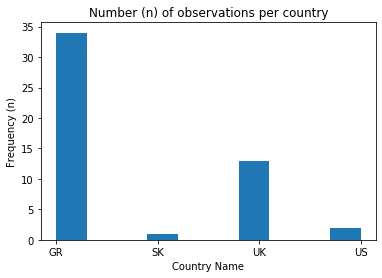

In [14]:
plt.hist(data['country'])
plt.xlabel('Country Name')
plt.ylabel('Frequency (n)')
plt.title("Number (n) of observations per country")
plt.show()

### Nice, we now have the entries normalized, with 4 countries - Germany (GR), United Kingdom (UK), South Korea (SK), and United States (US). Let's also normalize the currencies.

In [15]:
data.rename(columns={'Currency (e.g. EUR, GBP, USD)':'currency'}, inplace=True)

In [16]:
data['currency'].value_counts()

EUR           34
GBP           13
USD            2
Korean Won     1
Name: currency, dtype: int64

#### As we see from the above, currencies are already presented in a valid way!

In [17]:
data.head()

,country,currency,Price perception of the store brand,Average rental price near the grocery store,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
0,GR,EUR,Budget (cheap),826,2.0,2.22,1.0,2.99,1.0,1.49,...,6.0,1.99,10.0,1.990,0.6,4.49,1.0,6.79,0.40,3.49
1,GR,EUR,Budget (cheap),1090,1.0,1.99,2.0,3.29,0.7,2.69,...,10.0,2.99,10.0,1.990,0.4,2.79,0.4,3.49,0.35,7.00
2,GR,EUR,Mid-range,924,1.0,2.99,1.0,2.49,1.0,4.99,...,10.0,1.59,6.0,1.990,1.0,29.90,1.0,24.99,1.00,14.90
3,GR,EUR,Mid-range,941,1.0,2.99,1.0,2.99,1.0,2.99,...,6.0,2.49,10.0,2.790,1.0,7.48,NaN,NaN,NaN,NaN
4,SK,Korean Won,Mid-range,74.31USD(87500KW) per meter square. (evidence:...,0.1,0.40,0.1,0.76,0.1,0.37,...,1.0,0.36,1.0,0.282,0.1,0.62,0.1,1.25,0.10,1.38


### Cleaning up and normalizing the average rental price 

In [18]:
data.rename(columns={'Average rental price near the grocery store':'rent'}, inplace=True)

In [19]:
data.head()

,country,currency,Price perception of the store brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
0,GR,EUR,Budget (cheap),826,2.0,2.22,1.0,2.99,1.0,1.49,...,6.0,1.99,10.0,1.990,0.6,4.49,1.0,6.79,0.40,3.49
1,GR,EUR,Budget (cheap),1090,1.0,1.99,2.0,3.29,0.7,2.69,...,10.0,2.99,10.0,1.990,0.4,2.79,0.4,3.49,0.35,7.00
2,GR,EUR,Mid-range,924,1.0,2.99,1.0,2.49,1.0,4.99,...,10.0,1.59,6.0,1.990,1.0,29.90,1.0,24.99,1.00,14.90
3,GR,EUR,Mid-range,941,1.0,2.99,1.0,2.99,1.0,2.99,...,6.0,2.49,10.0,2.790,1.0,7.48,NaN,NaN,NaN,NaN
4,SK,Korean Won,Mid-range,74.31USD(87500KW) per meter square. (evidence:...,0.1,0.40,0.1,0.76,0.1,0.37,...,1.0,0.36,1.0,0.282,0.1,0.62,0.1,1.25,0.10,1.38


In [20]:
data.rent.value_counts()
## 1600 -- for 1 bedroom apartment (+ living room + kitchen) 
## 1600 for 1 bedroom app. 
## 1,050 GBP
## 2,150 

for i in range(len(data['rent'])):
    if data['rent'][i] == "2,150":
        data['rent'][i] = str(2150)
        print(data['rent'][i])
    if data['rent'][i] == "1,050 GBP":
        data['rent'][i] = str(1050)
        print(data['rent'][i])
    if data['rent'][i] == "1600 for 1 bedroom app.":
        data['rent'][i] = str(1600)
        print(data['rent'][i])
    if data['rent'][i] == " 1600 -- for 1 bedroom apartment (+ living room + kitchen)":
        data['rent'][i] = str(1600)
        print(data['rent'][i])
    if i == 4:
        data['rent'][i] = str(int(87500*15))

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2150
2150
1050
1600
1600


/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [21]:
for i in range(len(data)):
    data['rent'][i] = str(data['rent'][i])
    data['rent'][i] = data['rent'][i].replace(" ", "")
    data['rent'][i] = int(data['rent'][i])

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gui

In [22]:
data['rent'].value_counts()

2150       9
0          2
1600       2
1050       2
867        2
812        2
863        2
1846       2
877        2
3395       2
1800       1
1990       1
908        1
794        1
938        1
850        1
1090       1
924        1
1100       1
895        1
734        1
800        1
892        1
1128       1
1002       1
941        1
942        1
719        1
882        1
1312500    1
3000       1
826        1
802        1
Name: rent, dtype: int64

### Which one is equal to 0? Normalize! Set average to other ones in the same country.

In [23]:
data.rename(columns={'Price perception of the store brand':'brand'}, inplace=True)
data.loc[data["rent"] == 0]

,country,currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
27,GR,EUR,Mid-range,0,1.0,2.99,1.0,2.19,1.0,3.49,...,6.0,1.69,6.0,2.29,1.0,10.90,1.00,29.90,1.0,11.23
28,GR,EUR,Luxury (expensive),0,0.5,1.99,0.7,1.69,0.7,1.49,...,6.0,2.79,6.0,1.79,0.5,3.69,0.35,3.77,0.5,4.51


In [24]:
data.loc[(data['brand'] == 'Mid-range') & (data['country'] == "GR")]['rent']
avg_rent_mid_GR = sum(data.loc[(data['brand'] == 'Mid-range') & (data['country'] == "GR")]['rent'])/(len(data.loc[(data['brand'] == 'Mid-range') & (data['country'] == "GR")])-1)
print(avg_rent_mid_GR)

943.6


In [25]:
data.at[28, 'rent'] = 944

In [26]:
data.loc[data["rent"] == 944]

,country,currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
28,GR,EUR,Luxury (expensive),944,0.5,1.99,0.7,1.69,0.7,1.49,...,6.0,2.79,6.0,1.79,0.5,3.69,0.35,3.77,0.5,4.51


In [27]:
data.loc[(data['brand'] == 'Luxury (expensive)') & (data['country'] == "GR")]['rent']
#avg_rent_lux_GR = sum(data.loc[(data['brand'] == 'Luxury (expensive)') & (data['country'] == "GR")]['rent'])/(len(data.loc[(data['brand'] == 'Luxury (expensive)') & (data['country'] == "GR")])-1)
#print(avg_rent_lux_GR)

28    944
Name: rent, dtype: object

### We see that this entry is the only luxury (expensive) store location in Germany. Thus we will set the set the rent price to the average rent price of Mid-range brand in Germany.

In [28]:
data.loc[(data['brand'] == 'Luxury (expensive)')]

,country,currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
5,UK,GBP,Luxury (expensive),2150,1.00,2.20,0.10,0.50,0.10,0.625,...,1.0,29.20,NaN,NaN,1.00,8.75,1.00,7.50,0.60,4.50
20,UK,GBP,Luxury (expensive),2150,0.19,0.41,0.16,0.34,0.24,0.470,...,12.0,4.50,6.0,1.60,0.50,3.50,0.65,5.25,0.40,3.50
22,US,USD,Luxury (expensive),3395,0.45,2.99,0.45,3.99,0.45,2.490,...,12.0,5.99,12.0,6.99,0.45,5.99,0.45,6.99,0.45,6.99
28,GR,EUR,Luxury (expensive),944,0.50,1.99,0.70,1.69,0.70,1.490,...,6.0,2.79,6.0,1.79,0.50,3.69,0.35,3.77,0.50,4.51
29,UK,GBP,Luxury (expensive),3000,0.40,2.25,0.40,2.50,0.30,1.300,...,6.0,2.80,12.0,3.50,1.20,7.50,0.60,4.50,0.38,3.50


In [29]:
data.at[30, 'rent'] = 944

In [30]:
np.shape(data)

(50, 64)

## Let's convert all the currencies to EUR based on today's currency exchange rate:

### 0.87 USD = 1 EUR
### 0.0007 Korean Won = 1 EUR
### 1.17 GBP = 1 EUR

#### Let's check if values are missing to fill them out with average prices based on a location.

In [31]:
data[data.isna().any(axis=1)]

,country,currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
2,GR,EUR,Mid-range,924,1.000,2.99,1.000,2.49,1.000,4.990,...,10.0,1.59,6.0,1.990,1.00,29.90,1.000,24.99,1.00,14.90
3,GR,EUR,Mid-range,941,1.000,2.99,1.000,2.99,1.000,2.990,...,6.0,2.49,10.0,2.790,1.00,7.48,NaN,NaN,NaN,NaN
4,SK,Korean Won,Mid-range,1312500,0.100,0.40,0.100,0.76,0.100,0.370,...,1.0,0.36,1.0,0.282,0.10,0.62,0.100,1.25,0.10,1.38
5,UK,GBP,Luxury (expensive),2150,1.000,2.20,0.100,0.50,0.100,0.625,...,1.0,29.20,NaN,NaN,1.00,8.75,1.000,7.50,0.60,4.50
6,UK,GBP,Mid-range,2150,1.000,1.95,0.100,38.30,NaN,NaN,...,1.0,30.00,1.0,27.500,1.00,4.99,NaN,NaN,NaN,NaN
7,UK,GBP,Budget (cheap),2150,1.000,1.95,1.000,1.76,1.000,1.980,...,1.0,0.29,1.0,0.490,1.00,6.33,NaN,NaN,NaN,NaN
11,UK,GBP,Mid-range,1846,0.085,0.40,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.17,3.00,0.385,3.80,1.00,16.50
12,UK,GBP,Mid-range,1846,0.085,0.34,0.085,0.34,0.085,0.550,...,12.0,2.25,NaN,NaN,0.18,2.75,0.090,1.20,NaN,NaN
13,GR,EUR,Mid-range,882,1.000,2.99,1.000,2.49,1.000,1.990,...,6.0,3.29,6.0,1.990,1.00,17.99,1.000,8.72,1.00,12.99
14,GR,EUR,Budget (cheap),812,1.000,1.99,1.000,2.69,1.000,2.190,...,10.0,1.99,10.0,2.790,1.00,7.48,1.000,6.79,NaN,NaN


#### So many NaN values! Let's fill them out with 0s for now.

In [32]:
data = data.fillna(0)

#### Now let's multiply all the columns with prices corresponding to USD, Korean Won, and GBP by a scalar (currency exchange rate).

In [33]:
data

,country,currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
0,GR,EUR,Budget (cheap),826,2.000,2.22,1.000,2.99,1.000,1.490,...,6.0,1.99,10.0,1.990,0.600,4.49,1.000,6.79,0.40,3.49
1,GR,EUR,Budget (cheap),1090,1.000,1.99,2.000,3.29,0.700,2.690,...,10.0,2.99,10.0,1.990,0.400,2.79,0.400,3.49,0.35,7.00
2,GR,EUR,Mid-range,924,1.000,2.99,1.000,2.49,1.000,4.990,...,10.0,1.59,6.0,1.990,1.000,29.90,1.000,24.99,1.00,14.90
3,GR,EUR,Mid-range,941,1.000,2.99,1.000,2.99,1.000,2.990,...,6.0,2.49,10.0,2.790,1.000,7.48,0.000,0.00,0.00,0.00
4,SK,Korean Won,Mid-range,1312500,0.100,0.40,0.100,0.76,0.100,0.370,...,1.0,0.36,1.0,0.282,0.100,0.62,0.100,1.25,0.10,1.38
5,UK,GBP,Luxury (expensive),2150,1.000,2.20,0.100,0.50,0.100,0.625,...,1.0,29.20,0.0,0.000,1.000,8.75,1.000,7.50,0.60,4.50
6,UK,GBP,Mid-range,2150,1.000,1.95,0.100,38.30,0.000,0.000,...,1.0,30.00,1.0,27.500,1.000,4.99,0.000,0.00,0.00,0.00
7,UK,GBP,Budget (cheap),2150,1.000,1.95,1.000,1.76,1.000,1.980,...,1.0,0.29,1.0,0.490,1.000,6.33,0.000,0.00,0.00,0.00
8,UK,GBP,Mid-range,2150,1.000,2.00,1.000,2.80,1.000,2.200,...,1.0,0.40,1.0,0.300,1.000,7.50,1.000,8.08,1.00,17.31
9,GR,EUR,Mid-range,942,1.000,2.99,1.000,2.99,1.000,2.490,...,6.0,2.99,6.0,2.490,1.000,7.49,1.000,14.99,1.00,24.99


In [34]:
data.loc[data['currency'] == "USD", [data.columns[i] for i in range(3, len(data.columns), 2)]] = data.loc[data['currency'] == "USD", [data.columns[i] for i in range(3, len(data.columns), 2)]].apply(lambda x: x*0.87)

In [35]:
data.loc[data['currency'] == "Korean Won", [data.columns[i] for i in range(3, len(data.columns), 2)]] = data.loc[data['currency'] == "Korean Won", [data.columns[i] for i in range(3, len(data.columns), 2)]].apply(lambda x: x*0.0007*1000)

In [36]:
data.loc[data['currency'] == "GBP", [data.columns[i] for i in range(3, len(data.columns), 2)]] = data.loc[data['currency'] == "GBP", [data.columns[i] for i in range(3, len(data.columns), 2)]].apply(lambda x: x*1.17)

### Mission accomplished 🥳! 
### Let's change the name of currency to initial_currency, since now all the prices are in Euros.

In [37]:
data.rename(columns={'currency':'initial_currency'}, inplace=True)

In [38]:
data.head(1)

,country,initial_currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
0,GR,EUR,Budget (cheap),826.0,2.0,2.22,1.0,2.99,1.0,1.49,...,6.0,1.99,10.0,1.99,0.6,4.49,1.0,6.79,0.4,3.49


## Let's normalize the data now that we have the same prices. We will be normalizing all the entries to have a quantity of 1 kg, 1 l (for milk), and 1 item (for an egg).

In [39]:
prod_price = [data.columns[j] for j in range(5, len(data.columns), 2)]
prod_quantity = [data.columns[i] for i in range(4, len(data.columns), 2)]

In [40]:
for i in range(len(prod_price)):
    data[prod_price[i]] = data[prod_price[i]]/data[prod_quantity[i]]

## Let's fill out the empty spaces of products with the average prices of those products in the same country, with the same type of store.

#### We can fill out the empty spaces of products with average prices of the same products in the same country.

In [41]:
data.loc[data["country"] == "GR"] = data.loc[data["country"] == "GR"].fillna(data.loc[data["country"] == "GR"].mean())
data.loc[data["country"] == "US"] = data.loc[data["country"] == "US"].fillna(data.loc[data["country"] == "US"].mean())
data.loc[data["country"] == "UK"] = data.loc[data["country"] == "UK"].fillna(data.loc[data["country"] == "UK"].mean())
data.loc[data["country"] == "SK"] = data.loc[data["country"] == "SK"].fillna(data.mean())

In [42]:
data.isnull().values.any()

False

#### Now let's look at the distributions of all variables to see if there are any more mistakes in entries; let's see if there are any outliers!

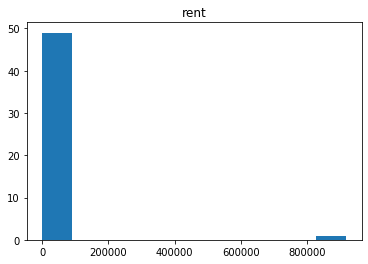

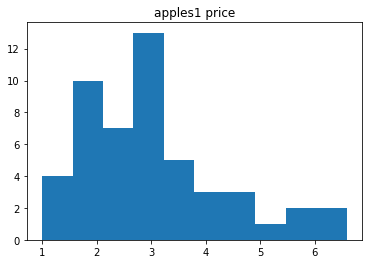

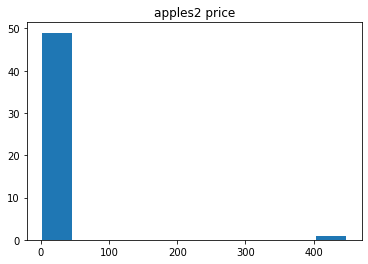

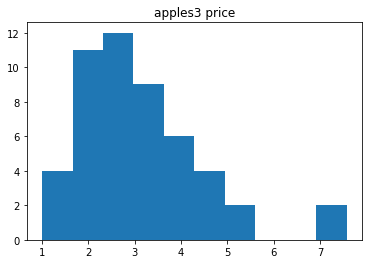

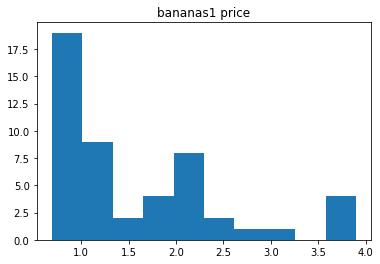

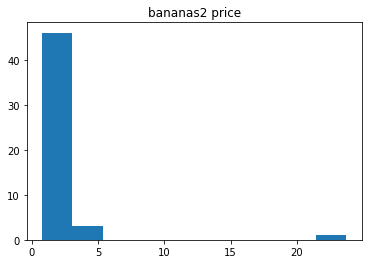

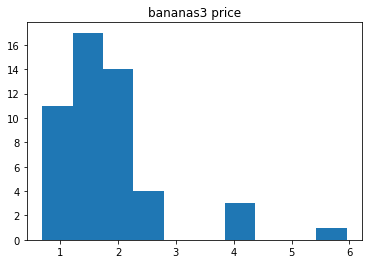

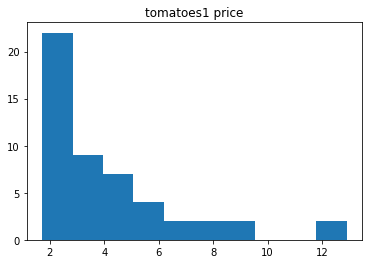

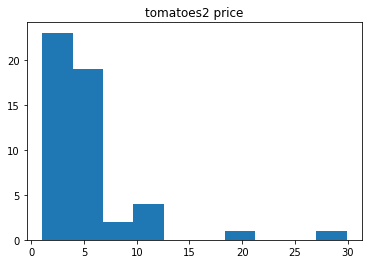

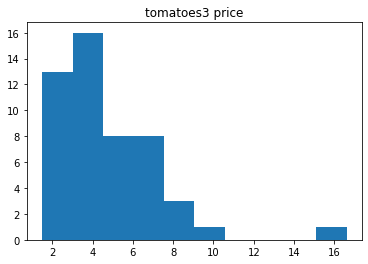

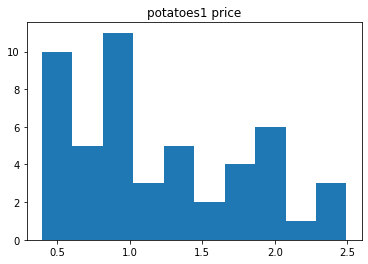

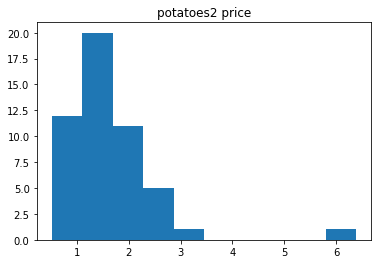

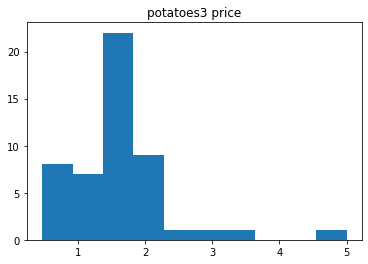

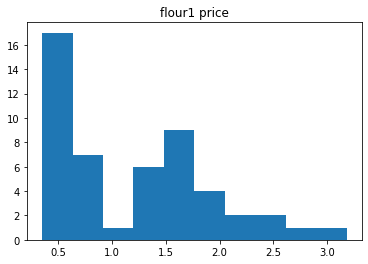

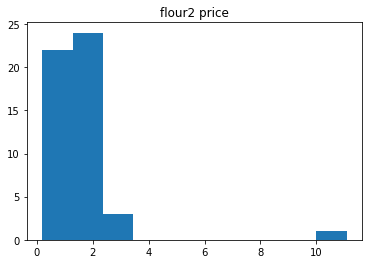

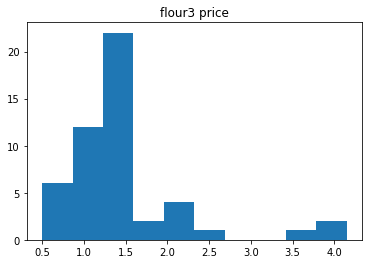

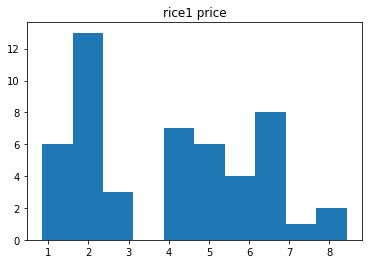

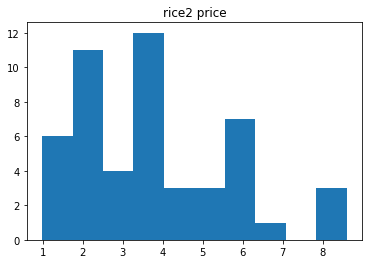

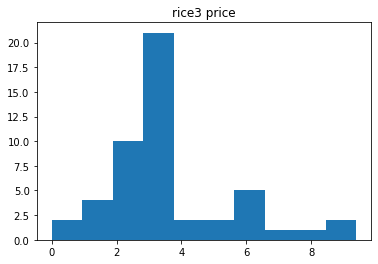

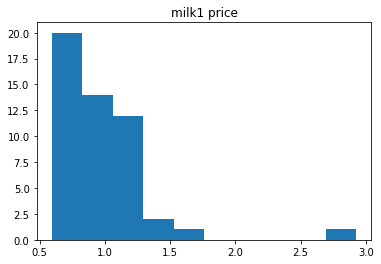

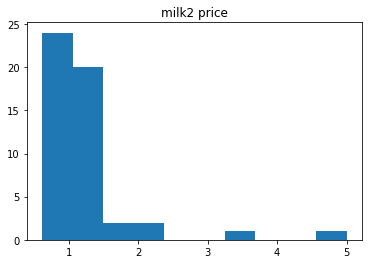

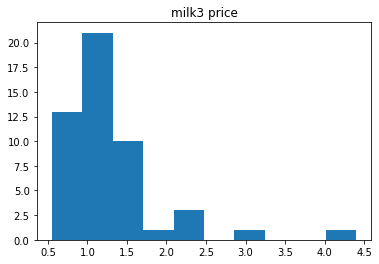

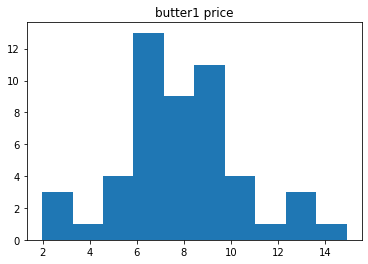

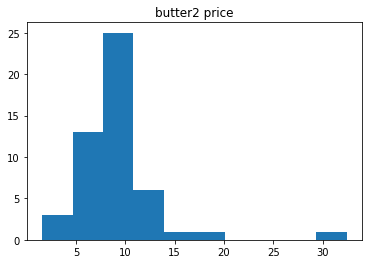

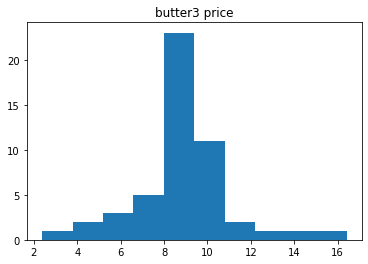

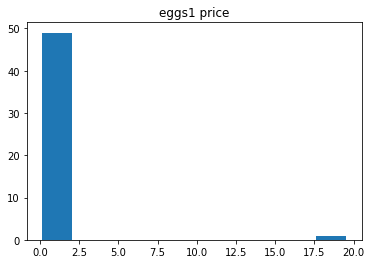

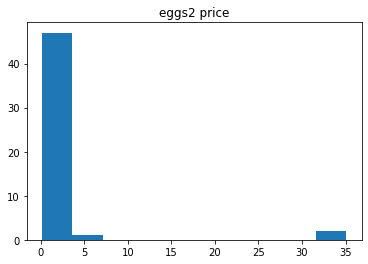

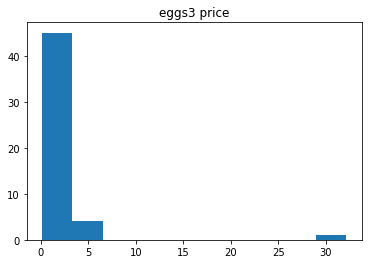

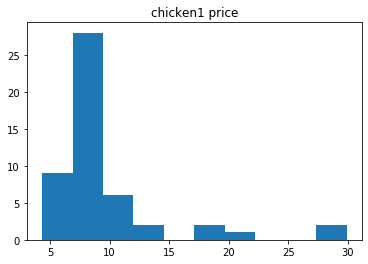

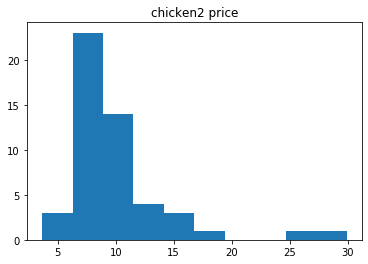

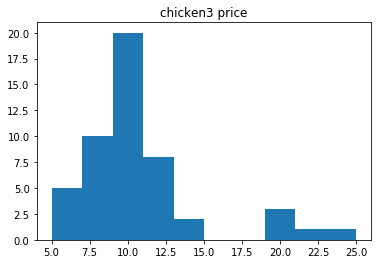

In [43]:
for i in range(3, len(data.columns), 2):
    plt.hist(data[data.columns[i]], bins=10)
    plt.title(data.columns[i])
    plt.show()

#### Based on the output, we need to fix the following:
- (1) **the outlier of rent** - an apartment that costs 800 000 EUR; this is due to South Korea's entry in the dataset being converted incorrectly; we need to use the value of 87.50 KW instead of 87500 KW, because the prices of grocery store items are presented in a form of 1.600 KW instead of 1600 KW, and the currency conversion function we apply results in having such an outlier value.
- (2) **the outlier of apples2** - $400 per kg per apples! We will convert this to an average price of other apples in the country, since these cost around a hundred of times less than this outlier cost.
- (3) **the outlier of bananas2**
- (4) **the outlier of flour2**
- (5) **the outlier of butter2**
- (6, 7, 8) **the outliers of eggs1, eggs2, eggs3**

#### (1) Fixing the outlier of rent for apartment in South Korea, by dividing the value by 1000:

In [44]:
data['rent'][4] = data['rent'][4]/1000

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
data['rent'][4] 

918.75

#### (2) Fixing the outlier of apple2 price, by setting it to average price of apples in the country.

In [46]:
data[data['apples2 price'] > 100]

,country,initial_currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
6,UK,GBP,Mid-range,2515.5,1.0,2.2815,0.1,448.11,0.0,4.050997,...,1.0,35.1,1.0,32.175,1.0,5.8383,0.0,8.670802,0.0,11.470386


In [47]:
data['apples2 price'][6] = data['apples2 price'].loc[(data["country"] == "GR") & (data["brand"] == "Mid-range")].mean()

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
data['apples2 price'][6]

2.768650793650794

#### (3) Fixing the outlier of bananas2 price, by setting it to average price of bananas2 in the country.

In [49]:
data[data['bananas2 price'] > 20]

,country,initial_currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
4,SK,Korean Won,Mid-range,918.75,0.1,2.8,0.1,5.32,0.1,2.59,...,1.0,0.252,1.0,0.1974,0.1,4.34,0.1,8.75,0.1,9.66


#### We see that such outlier comes from data collection in South Korea, thus we cannot change it to average prices of entries from the other countries. While this seems like an outlier, it is acctually due to high cost of fruit in South Korea that we will explore more later!

#### (4) Fixing the outlier of flour2 price, by setting it to average price of flour2 in the country.

In [50]:
data[data['flour2 price'] > 10]

,country,initial_currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
28,GR,EUR,Luxury (expensive),944.0,0.5,3.98,0.7,2.414286,0.7,2.128571,...,6.0,0.465,6.0,0.298333,0.5,7.38,0.35,10.771429,0.5,9.02


#### ** We see that this outlier comes from a luxury grocery store in Germany, and it has overall larger cost for products than other stores. Thus we decide to keep this outlier!

#### (5) Fixing the outlier of butter2 price, by setting it to average price of butter2 in the country.

In [51]:
data[data['butter2 price'] > 30]

,country,initial_currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
4,SK,Korean Won,Mid-range,918.75,0.1,2.8,0.1,5.32,0.1,2.59,...,1.0,0.252,1.0,0.1974,0.1,4.34,0.1,8.75,0.1,9.66


#### **This outlier also comes from data collection in South Korea. Since this country is only limited to one sample, we cannot replace the value of this product with average value of the same product in other countries. We will keep this outlier for further analysis.

#### (6) Fixing the outlier of eggs1 price, by setting it to average price of eggs1 in the country.

In [52]:
data[data['eggs1 price'] > 17]

,country,initial_currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
6,UK,GBP,Mid-range,2515.5,1.0,2.2815,0.1,2.768651,0.0,4.050997,...,1.0,35.1,1.0,32.175,1.0,5.8383,0.0,8.670802,0.0,11.470386


In [53]:
data['eggs1 price'][6] = data['eggs1 price'].loc[(data["country"] == "UK") &(data["brand"] == "Mid-range")].mean()

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
data['eggs1 price'][6]

2.3859333333333326

#### (7) Fixing the outliers of eggs2 price, by setting them to average prices of eggs2 in the country, and the same brand of the store.

In [55]:
data[data['eggs2 price'] > 17]

,country,initial_currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
5,UK,GBP,Luxury (expensive),2515.5,1.0,2.5740,0.1,5.850000,0.1,7.312500,...,1.0,34.164,0.0,3.922967,1.0,10.2375,1.0,8.775000,0.6,8.775000
6,UK,GBP,Mid-range,2515.5,1.0,2.2815,0.1,2.768651,0.0,4.050997,...,1.0,35.100,1.0,32.175000,1.0,5.8383,0.0,8.670802,0.0,11.470386


In [56]:
data['eggs2 price'][5] = data['eggs2 price'].loc[(data["country"] == "UK") &(data["brand"] == "Luxury (expensive)")].mean()
data['eggs2 price'][6] = data['eggs2 price'].loc[(data["country"] == "UK") &(data["brand"] == "Mid-range")].mean()

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
data['eggs2 price'][5]

11.716249999999997

In [58]:
data['eggs2 price'][6]

4.793033194444444

#### (8) Fixing the outlier of eggs3 price, by setting it to average price of eggs3 in the country.

In [59]:
data[data['eggs3 price'] > 17]

,country,initial_currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,eggs2 quantity (kg),eggs2 price,eggs3 quantity (kg),eggs3 price,chicken1 quantity (kg),chicken1 price,chicken2 quantity (kg),chicken2 price,chicken3 quantity (kg),chicken3 price
6,UK,GBP,Mid-range,2515.5,1.0,2.2815,0.1,2.768651,0.0,4.050997,...,1.0,4.793033,1.0,32.175,1.0,5.8383,0.0,8.670802,0.0,11.470386


In [60]:
data['eggs3 price'][6] = data['eggs3 price'].loc[(data["country"] == "UK") &(data["brand"] == "Mid-range")].mean()

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
data['eggs3 price'][6]

5.094338888888888

### Done with outliers for now! We can look into distributions of all variables again.

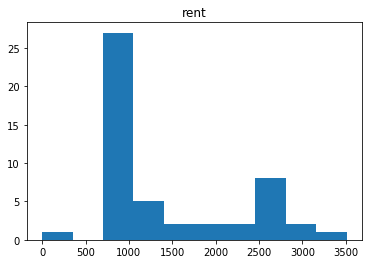

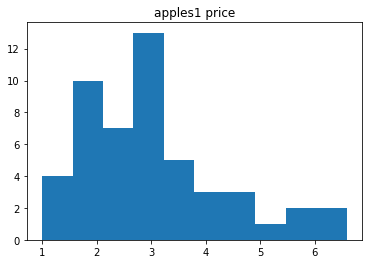

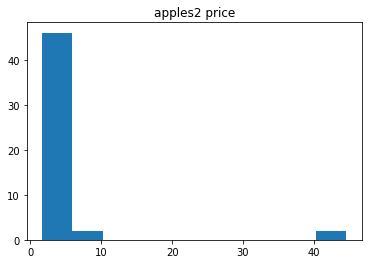

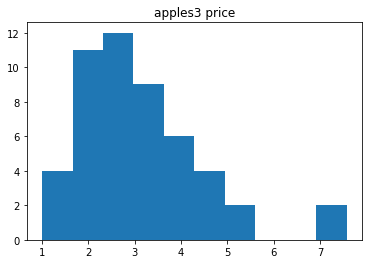

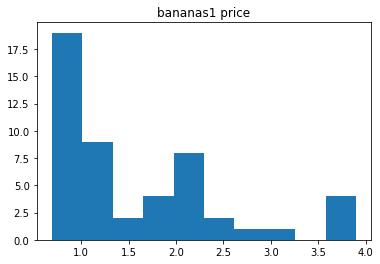

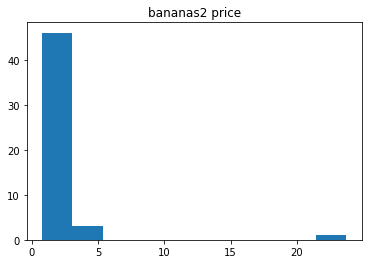

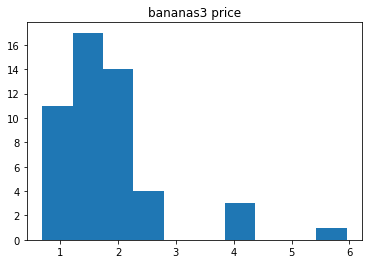

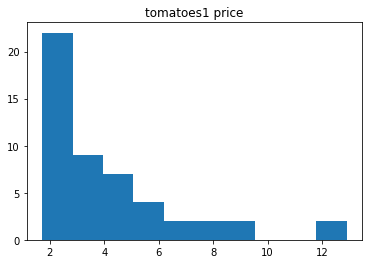

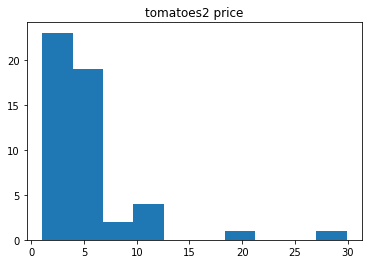

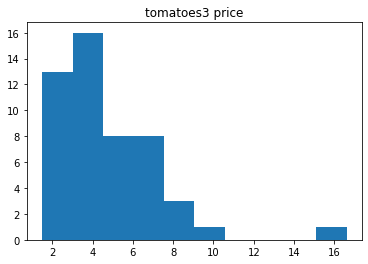

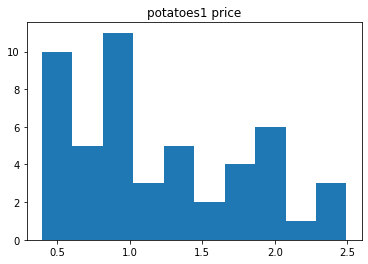

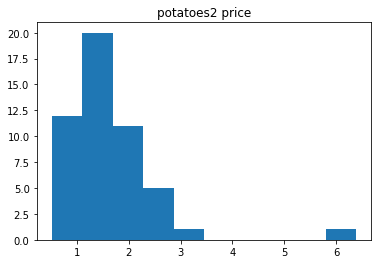

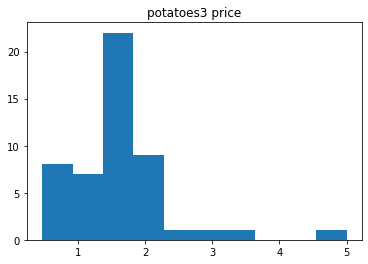

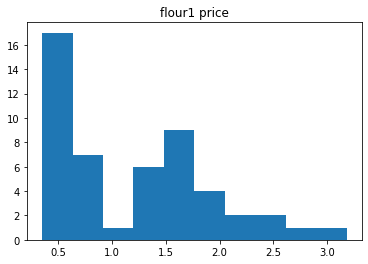

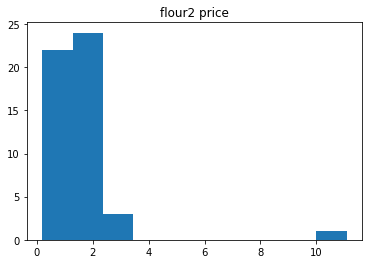

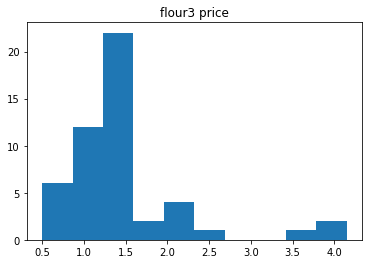

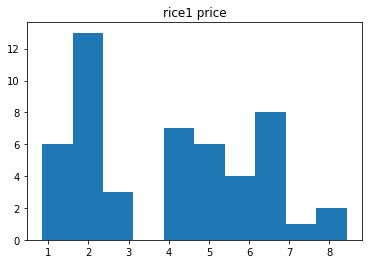

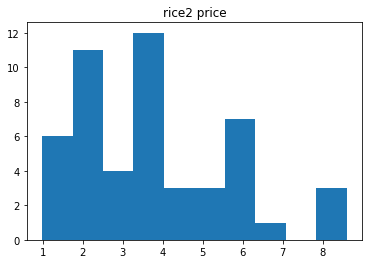

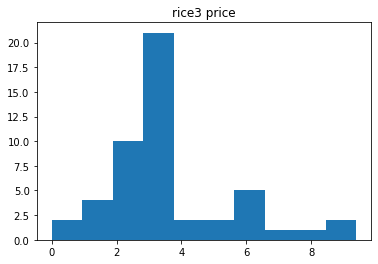

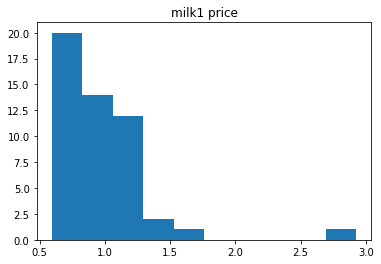

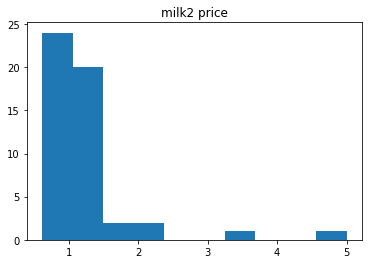

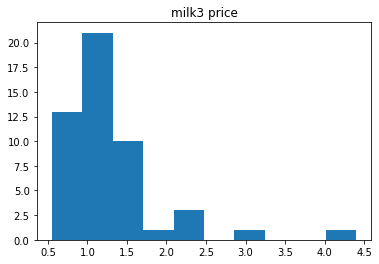

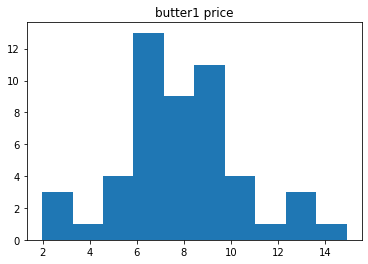

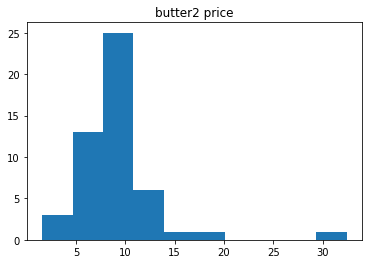

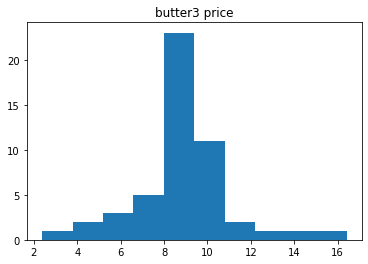

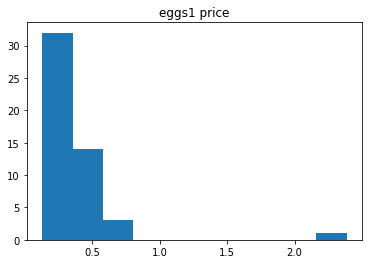

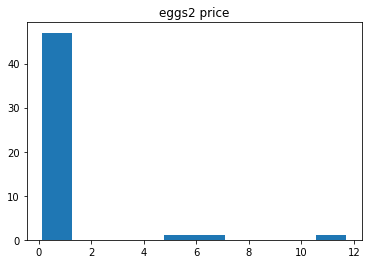

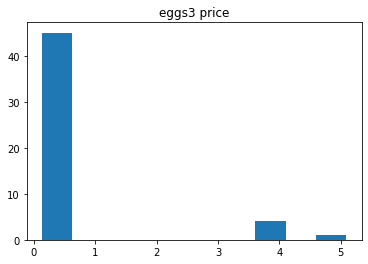

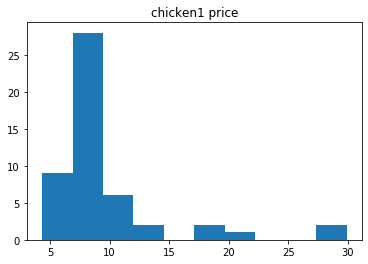

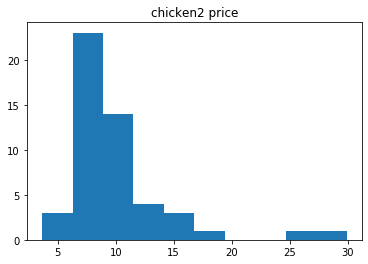

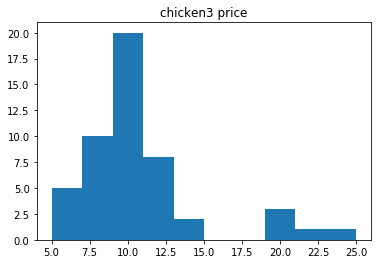

In [62]:
for i in range(3, len(data.columns), 2):
    plt.hist(data[data.columns[i]], bins=10)
    plt.title(data.columns[i])
    plt.show()

#### We can see that the outliers are still present, however they do not skew data distributions as much as they did before. We can note that some of these high prices are due to the brand of the store - the higher ones come from mid-range or luxury stores.

## Calculating average prices for each product per each grocery store.

In [63]:
products = ['apples','bananas','tomatoes','potatoes','flour','rice','milk','butter','eggs','chicken']

# we choose to have a difference of 6 because our formula 
# to calculate average values includes three index values
for i, j in zip(range(5, len(data.columns), 6), range(len(products))):
        data[products[j]+" average price"] = (data[data.columns[i]]+data[data.columns[i+1]]+data[data.columns[i+2]])/3

In [64]:
data

,country,initial_currency,brand,rent,apples1 quantity (kg),apples1 price,apples2 quantity (kg),apples2 price,apples3 quantity (kg),apples3 price,...,apples average price,bananas average price,tomatoes average price,potatoes average price,flour average price,rice average price,milk average price,butter average price,eggs average price,chicken average price
0,GR,EUR,Budget (cheap),826.00,2.000,1.110000,1.000,2.990000,1.000,1.490000,...,1.700000,2.163333,2.423333,1.350000,0.760000,1.990000,0.840000,5.253333,2.193333,5.091111
1,GR,EUR,Budget (cheap),1090.00,1.000,1.990000,2.000,1.645000,0.700,3.842857,...,1.878333,1.093333,4.460000,1.190667,0.760000,3.250000,1.080000,3.972778,3.475407,5.366667
2,GR,EUR,Mid-range,924.00,1.000,2.990000,1.000,2.490000,1.000,4.990000,...,2.160000,1.290000,3.323333,1.660000,0.993333,4.020000,1.126667,6.723333,3.529333,18.630000
3,GR,EUR,Mid-range,941.00,1.000,2.990000,1.000,2.990000,1.000,2.990000,...,2.326667,1.290000,2.573333,1.793333,1.060000,3.486667,0.996667,6.190000,2.304444,6.071252
4,SK,Korean Won,Mid-range,918.75,0.100,2.800000,0.100,5.320000,0.100,2.590000,...,2.740000,8.386667,5.026667,1.456667,0.896667,2.595190,1.690000,14.966667,0.462133,4.396667
5,UK,GBP,Luxury (expensive),2515.50,1.000,2.574000,0.100,5.850000,0.100,7.312500,...,2.841333,1.197900,5.489133,0.957333,1.347333,3.102333,0.976833,6.495333,4.436870,6.670833
6,UK,GBP,Mid-range,2515.50,1.000,2.281500,0.100,2.768651,0.000,4.050997,...,1.716717,1.028303,2.919033,1.343433,1.273233,2.673333,1.756833,5.528133,2.726322,4.836367
7,UK,GBP,Budget (cheap),2515.50,1.000,2.281500,1.000,2.059200,1.000,2.316600,...,1.780233,1.292733,2.119533,0.742833,0.711633,2.673333,0.844233,5.216133,0.516633,5.358967
8,UK,GBP,Mid-range,2515.50,1.000,2.340000,1.000,3.276000,1.000,2.574000,...,2.205333,1.893333,2.220933,1.425333,1.834833,2.517333,1.011933,5.559333,0.555633,6.409533
9,GR,EUR,Mid-range,942.00,1.000,2.990000,1.000,2.990000,1.000,2.490000,...,2.326667,1.326667,2.660000,1.726667,1.126667,2.656667,1.060000,6.190000,2.259111,7.826667


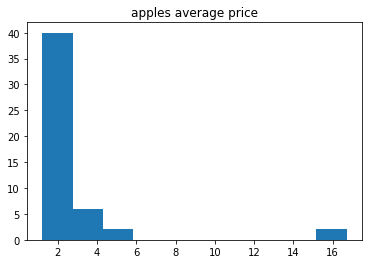

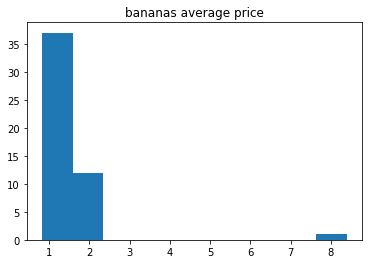

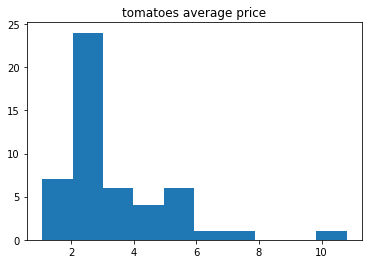

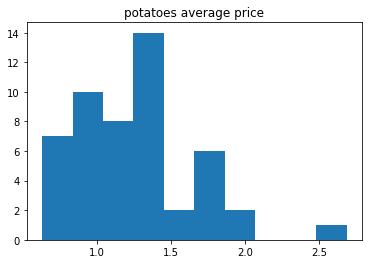

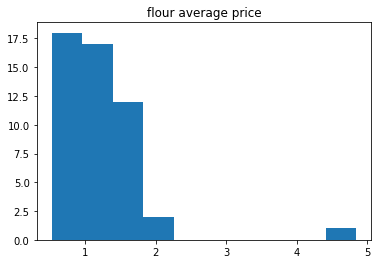

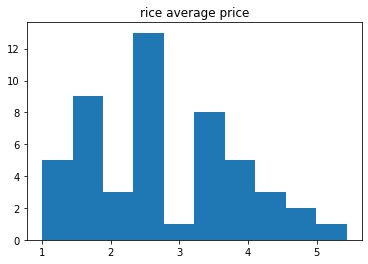

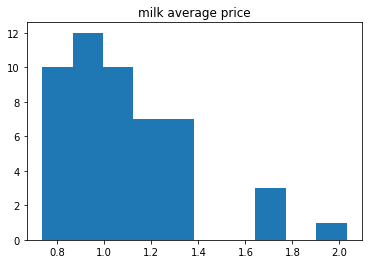

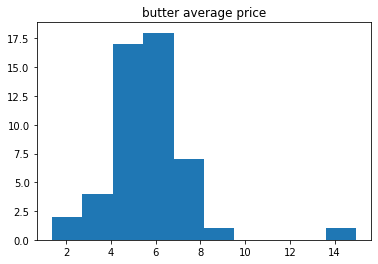

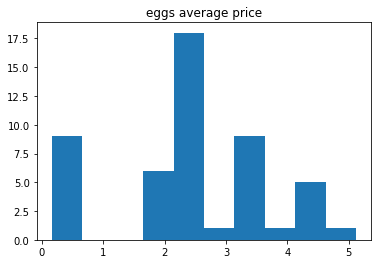

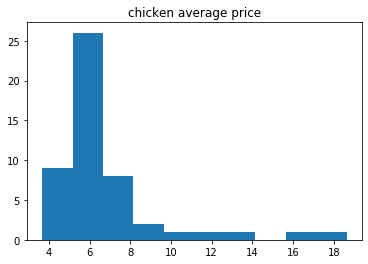

In [65]:
for i in range(64, len(data.columns)):
    plt.hist(data[data.columns[i]], bins=10)
    plt.title(data.columns[i])
    plt.show()

#### Let's turn the brand types into numerical data (budget grocery store - 1, mid-range - 2, luxury - 3), and countries into numerical data (GR - 1, UK - 2, US - 3, SK - 4 ).

In [66]:
for i in range(len(data)):
    if data['country'][i] == "GR":
        data['country'][i] = 1
    if data['country'][i] == "UK":
        data['country'][i] = 2
    if data['country'][i] == "US":
        data['country'][i] = 3
    if data['country'][i] == "SK":
        data['country'][i] = 4

for i in range(len(data)):
    if data['brand'][i] == "Budget (cheap)":
        data['brand'][i] = 1
    if data['brand'][i] == "Mid-range":
        data['brand'][i] = 2
    if data['brand'][i] == "Luxury (expensive)":
        data['brand'][i] = 3

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/p

#### Let's make a copy of our dataset and limit it to columns of interest for further inference.
#### The variables will include: country, store brand, average rent price, 10 variables of average price of grocery store products.

In [67]:
dataset_columns = list(data.columns[2:4]) + list(data.columns[64:])
dataset_columns.insert(0, str(data.columns[0]))
dataset = data[dataset_columns].copy()

## Model including brand and country.

#### Let's change our dataset so that we also have the numerical values for our products, to use this dataset for modeling in Stan.

In [68]:
import pystan

In [69]:
for i in range(3, len(dataset.columns)):
    dataset = dataset.rename(columns = {dataset.columns[i]:i-2})
dataset

,country,brand,rent,1,2,3,4,5,6,7,8,9,10
0,1,1,826.00,1.700000,2.163333,2.423333,1.350000,0.760000,1.990000,0.840000,5.253333,2.193333,5.091111
1,1,1,1090.00,1.878333,1.093333,4.460000,1.190667,0.760000,3.250000,1.080000,3.972778,3.475407,5.366667
2,1,2,924.00,2.160000,1.290000,3.323333,1.660000,0.993333,4.020000,1.126667,6.723333,3.529333,18.630000
3,1,2,941.00,2.326667,1.290000,2.573333,1.793333,1.060000,3.486667,0.996667,6.190000,2.304444,6.071252
4,4,2,918.75,2.740000,8.386667,5.026667,1.456667,0.896667,2.595190,1.690000,14.966667,0.462133,4.396667
5,2,3,2515.50,2.841333,1.197900,5.489133,0.957333,1.347333,3.102333,0.976833,6.495333,4.436870,6.670833
6,2,2,2515.50,1.716717,1.028303,2.919033,1.343433,1.273233,2.673333,1.756833,5.528133,2.726322,4.836367
7,2,1,2515.50,1.780233,1.292733,2.119533,0.742833,0.711633,2.673333,0.844233,5.216133,0.516633,5.358967
8,2,2,2515.50,2.205333,1.893333,2.220933,1.425333,1.834833,2.517333,1.011933,5.559333,0.555633,6.409533
9,1,2,942.00,2.326667,1.326667,2.660000,1.726667,1.126667,2.656667,1.060000,6.190000,2.259111,7.826667


#### We also want to transpose this dataset, so that we get an array of a form that includes [country, brand, rent price, price, product_index].

In [70]:
array = []

for i in range(len(dataset)):
    for j in range(3, len(dataset.columns)):
        array.append([dataset['country'][i], dataset['brand'][i], dataset['rent'][i], dataset[dataset.columns[j]][i], dataset.columns[j]])

In [71]:
print('Product is', array[0][4], ", its country is", array[0][0],', its brand is', array[0][1], ', average rent price is', array[0][2], ', and product price is', array[0][3])

Product is 1 , its country is 1 , its brand is 1 , average rent price is 826.0 , and product price is 1.7000000000000002


In [72]:
array=np.array(array)

In [73]:
stan_data = {
    'n': len(array), # length of the data
    'prices': array[:,3], #all prices
    'n_store_types' : 3, # length of store types
    'store_type' : array[:,1].astype(int), # all stores
    'countries_n' : 4, # amount of countries
    'country' : array[:,0].astype(int), # all countries
    'products_n' : 10, # amount of products
    'product' : array[:,4].astype(int), # all products
    'rent' : array[:,2], # all rent
    'mu_coeff': -0.05,  # mu coefficient for location and country priors
    'sigma_coeff':  0.25,  # sigma coefficient for location and country priors
    'mu_prior': 1.25, # mu coefficient for product price prior
    'sigma_prior': 0.5 # sigma coefficient for product price prior
}

In [74]:
stan_code = """
data {
    real mu_coeff; 
    real sigma_coeff; 
    real mu_prior; 
    real sigma_prior;
    int<lower=1> n;
    real<lower=0> prices[n]; 
    int<lower=1> n_store_types; 
    int<lower=0> store_type[n]; 
    int<lower=1> countries_n; 
    int<lower=0> country[n]; 
    int<lower=1> products_n; 
    int<lower=0> product[n]; 
}

parameters {
    real<lower = 0> base_price[products_n];
    real<lower = 0> sigma[products_n]; 
    real<lower = 0> store_type_coeff[n_store_types];
    real<lower = 0> country_coeff[countries_n]; 
}

model {
    // prior
    store_type_coeff ~ lognormal(mu_coeff,sigma_coeff); 
    country_coeff ~ lognormal(mu_coeff,sigma_coeff); 
    base_price ~ lognormal(mu_prior,sigma_prior); 
    // likelihood
    for (i in 1:n){ 
       prices[i] ~ normal(base_price[product[i]]*store_type_coeff[store_type[i]]*country_coeff[country[i]], sigma[product[i]]);
    }
}

"""
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_452edf52fa89e0c6698dd31dc0df7bf2 NOW.


In [75]:
stan_results = stan_model.sampling(data=stan_data)
print(stan_results.stansummary(pars=['base_price','sigma','store_type_coeff','country_coeff'], probs=[0.01, 0.5, 0.99]))

Inference for Stan model: anon_model_452edf52fa89e0c6698dd31dc0df7bf2.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                      mean se_mean     sd     1%    50%    99%  n_eff   Rhat
base_price[1]         3.81    0.02   0.71   2.31   3.76   5.66   1074    1.0
base_price[2]         2.14    0.01   0.32   1.51   2.12   2.97    718    1.0
base_price[3]         4.47    0.03   0.65   3.14   4.43   6.15    669    1.0
base_price[4]         1.74  9.8e-3   0.23   1.29   1.73   2.31    545   1.01
base_price[5]         1.66  9.7e-3   0.24   1.18   1.64   2.28    606    1.0
base_price[6]          3.8    0.02   0.52   2.75   3.77   5.06    655   1.01
base_price[7]         1.49  8.4e-3    0.2    1.1   1.48   1.99    546   1.01
base_price[8]         7.79    0.04   1.04   5.75   7.71  10.49    550    1.0
base_price[9]         3.26    0.02   0.47    2.3   3.22   4.48    634    1.0
base_price[10]        9.02    0.05   1.25

### Let's look at the data viz for coefficients.

In [76]:
posterior_samples = stan_results.extract()

In [77]:
prices_stan = np.transpose(np.array(posterior_samples['base_price']))
country_mult = np.transpose(np.array(posterior_samples['country_coeff']))
store_type_mult = np.transpose(np.array(posterior_samples['store_type_coeff']))

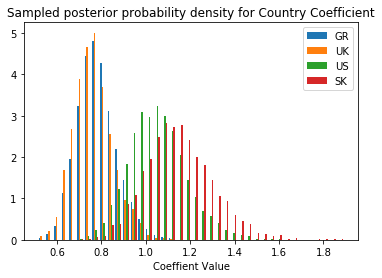

In [78]:
countries = ["GR", "UK", "US", "SK"]
plt.hist([x for x in country_mult[0:4]], bins = 40, density=True)
plt.xlabel("Coeffient Value")
plt.title('Sampled posterior probability density for Country Coefficient')
plt.legend(countries)

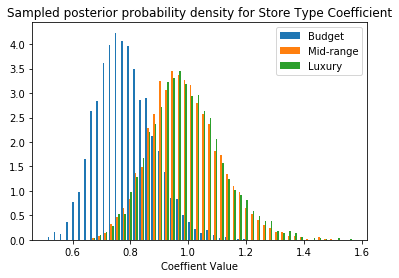

In [79]:
ratings = ['Budget','Mid-range','Luxury']
plt.hist([x for x in store_type_mult], bins=50, density=True)
plt.xlabel("Coeffient Value")
plt.title('Sampled posterior probability density for Store Type Coefficient')
plt.legend(ratings)
plt.show()

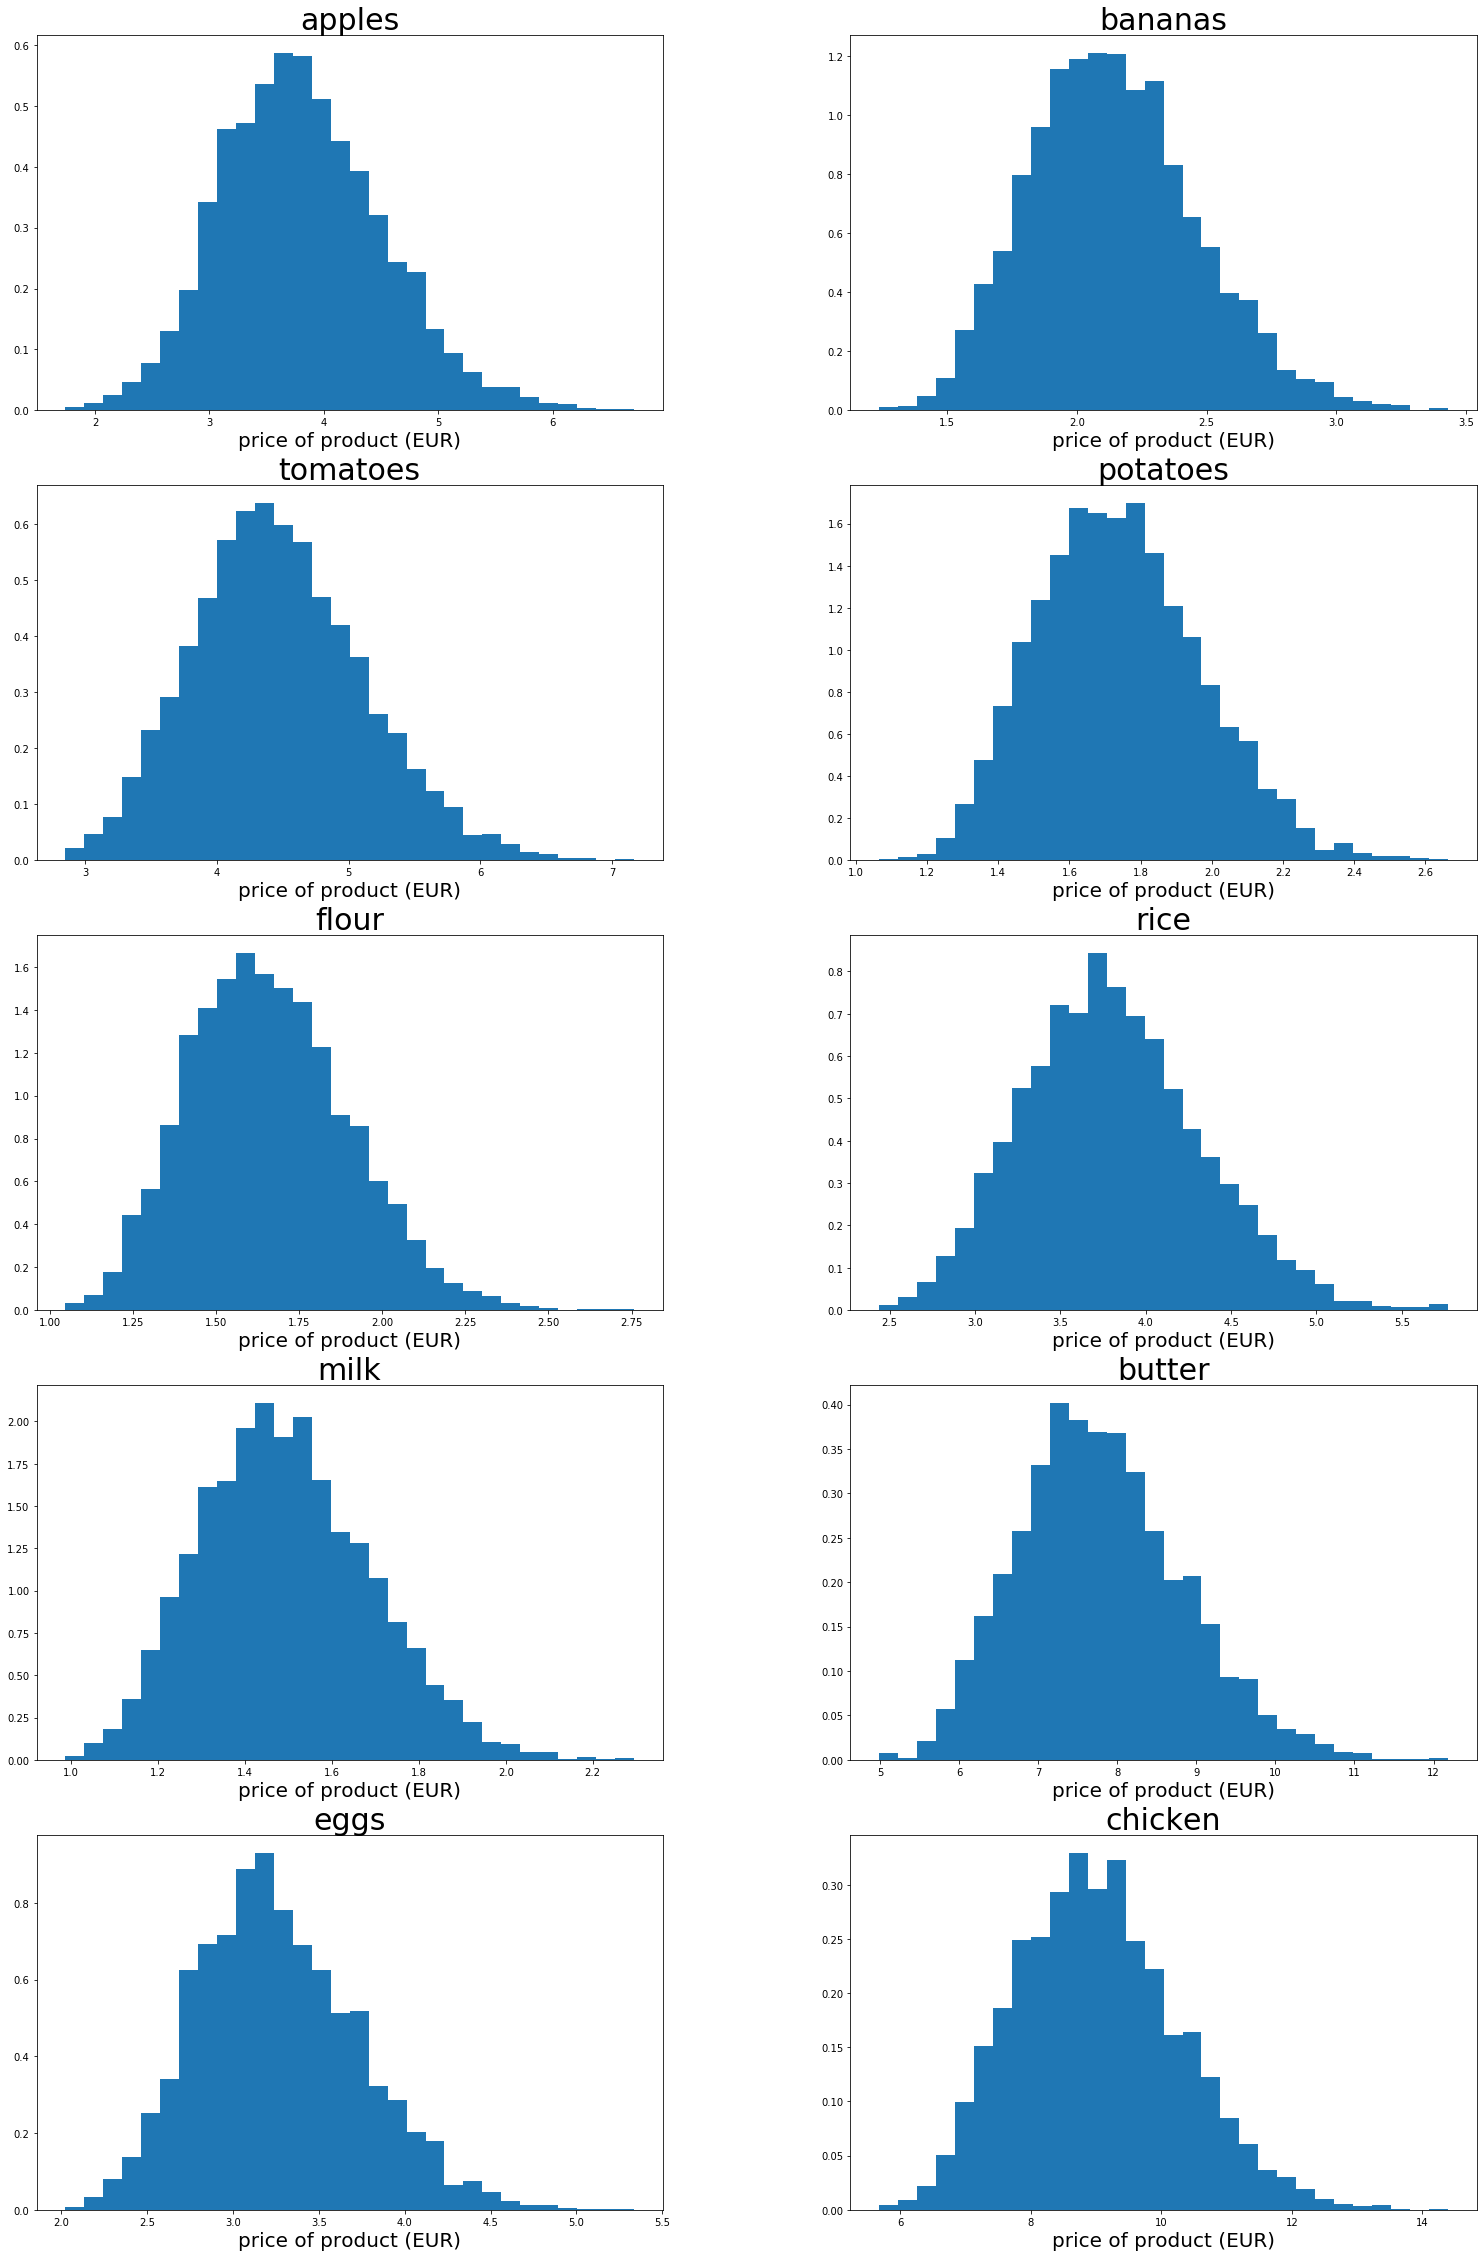

In [80]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(20,40))

ax1.hist([x for x in prices_stan[0]], bins=30, density=True)
ax1.set_title(products[0], size=30)
ax1.set_xlabel("price of product (EUR)", size=20)

ax2.hist([x for x in prices_stan[1]], bins=30, density=True)
ax2.set_title(products[1], size=30)
ax2.set_xlabel("price of product (EUR)", size=20)

ax3.hist([x for x in prices_stan[2]], bins=30, density=True)
ax3.set_title(products[2], size=30)
ax3.set_xlabel("price of product (EUR)", size=20)

ax4.hist([x for x in prices_stan[3]], bins=30, density=True)
ax4.set_title(products[3], size=30)
ax4.set_xlabel("price of product (EUR)", size=20)

ax5.hist([x for x in prices_stan[4]], bins=30, density=True)
ax5.set_title(products[4], size=30)
ax5.set_xlabel("price of product (EUR)", size=20)

ax6.hist([x for x in prices_stan[5]], bins=30, density=True)
ax6.set_title(products[5], size=30)
ax6.set_xlabel("price of product (EUR)", size=20)

ax7.hist([x for x in prices_stan[6]], bins=30, density=True)
ax7.set_title(products[6], size=30)
ax7.set_xlabel("price of product (EUR)", size=20)

ax8.hist([x for x in prices_stan[7]], bins=30, density=True)
ax8.set_title(products[7], size=30)
ax8.set_xlabel("price of product (EUR)", size=20)

ax9.hist([x for x in prices_stan[8]], bins=30, density=True)
ax9.set_title(products[8], size=30)
ax9.set_xlabel("price of product (EUR)", size=20)

ax10.hist([x for x in prices_stan[9]], bins=30, density=True)
ax10.set_title(products[9], size=30)
ax10.set_xlabel("price of product (EUR)", size=20)

fig.subplots_adjust(left=25,right=26, wspace=0.3)


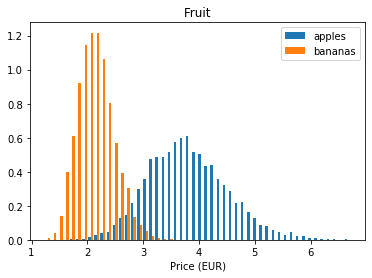

In [81]:
plt.hist([x for x in prices_stan[0:2]],bins=50,density=True)
plt.xlabel("Price (EUR)")
plt.title('Fruit')
plt.legend(products[0:2])
plt.show()


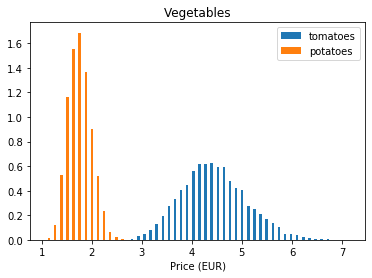

In [82]:
plt.hist([x for x in prices_stan[2:4]],bins=50,density=True)
plt.xlabel("Price (EUR)")
plt.title('Vegetables')
plt.legend(products[2:4])
plt.show()

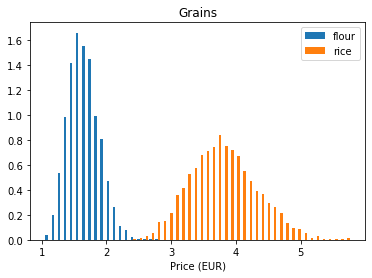

In [83]:
plt.hist([x for x in prices_stan[4:6]],bins=50,density=True)
plt.xlabel("Price (EUR)")
plt.title('Grains')
plt.legend(products[4:6])
plt.show()

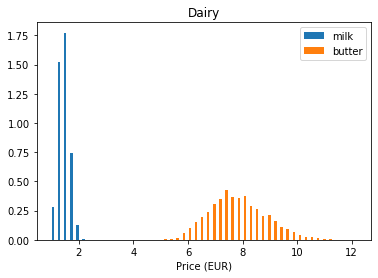

In [84]:
plt.hist([x for x in prices_stan[6:8]],bins=50,density=True)
plt.xlabel("Price (EUR)")
plt.title('Dairy')
plt.legend(products[6:8])
plt.show()

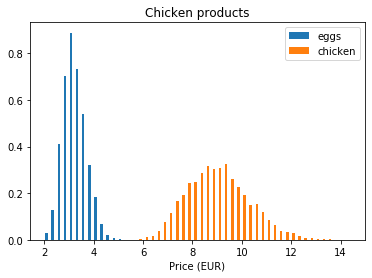

In [85]:
plt.hist([x for x in prices_stan[8:10]],bins=50,density=True)
plt.xlabel("Price (EUR)")
plt.title('Chicken products')
plt.legend(products[8:10])
plt.show()

### Base price for each product is presented below:

In [86]:
base_prices = []
for i in range(len(products)):
    print("Base average price for", products[i], "is:", round(np.mean(prices_stan[i]), 2), "in EUR.")
    base_prices.append(round(np.mean(prices_stan[i]), 2))

Base average price for apples is: 3.81 in EUR.
Base average price for bananas is: 2.14 in EUR.
Base average price for tomatoes is: 4.47 in EUR.
Base average price for potatoes is: 1.74 in EUR.
Base average price for flour is: 1.66 in EUR.
Base average price for rice is: 3.8 in EUR.
Base average price for milk is: 1.49 in EUR.
Base average price for butter is: 7.79 in EUR.
Base average price for eggs is: 3.26 in EUR.
Base average price for chicken is: 9.02 in EUR.


### Posterior 98% confidence intervals for the price of each product are presented below:

In [87]:
ci_prices = []
for i in range(len(products)):
    print("Posterior 99% CI for the base price of", products[i], "is:", [round(i, 2) for i in np.percentile(prices_stan[i], [1,99])], "in EUR.")
    ci_prices.append([round(i, 2) for i in np.percentile(prices_stan[i], [1,99])])

Posterior 99% CI for the base price of apples is: [2.31, 5.66] in EUR.
Posterior 99% CI for the base price of bananas is: [1.51, 2.97] in EUR.
Posterior 99% CI for the base price of tomatoes is: [3.14, 6.15] in EUR.
Posterior 99% CI for the base price of potatoes is: [1.29, 2.31] in EUR.
Posterior 99% CI for the base price of flour is: [1.18, 2.28] in EUR.
Posterior 99% CI for the base price of rice is: [2.75, 5.05] in EUR.
Posterior 99% CI for the base price of milk is: [1.1, 1.99] in EUR.
Posterior 99% CI for the base price of butter is: [5.75, 10.49] in EUR.
Posterior 99% CI for the base price of eggs is: [2.3, 4.47] in EUR.
Posterior 99% CI for the base price of chicken is: [6.54, 12.21] in EUR.


In [88]:
ci_lower = [ci_prices[i][0] for i in range(len(ci_prices))]
ci_upper = [ci_prices[i][1] for i in range(len(ci_prices))]

### Let's plot the values of base average price of products and 98% confidence intervals.

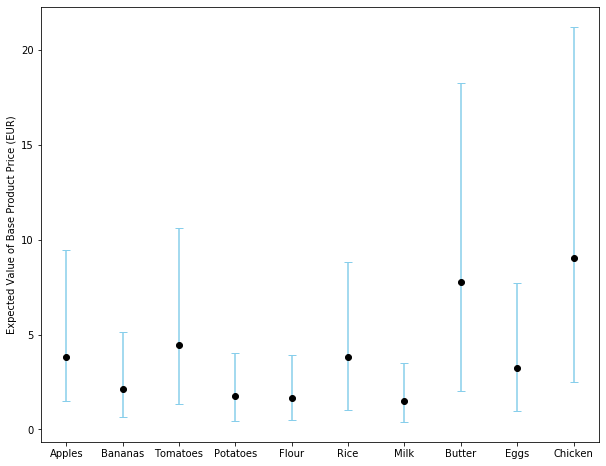

In [89]:
plt.figure(figsize = (10, 8))
plt.errorbar(np.linspace(0,9,10), base_prices, [ci_lower, ci_upper], color='black', ecolor='skyblue',capsize=4, linestyle='', marker='o')
plt.ylabel('Expected Value of Base Product Price (EUR)')
plt.xticks(np.arange(10),('Apples','Bananas', 'Tomatoes','Potatoes','Flour','Rice', 'Milk','Butter','Eggs','Chicken'))
plt.show()

### Let's examine the relationship between monthly median income per country in 2021 and the country multiplier value we got from our Stan model.

In [90]:
median_income = [16845, 14793, 16845, 12507]
income = [i*0.87 for i in median_income]
countries = ["GR", "UK", "USA", "SK"]
country_multipliers = [0.8, 0.78, 1.08,1.17]

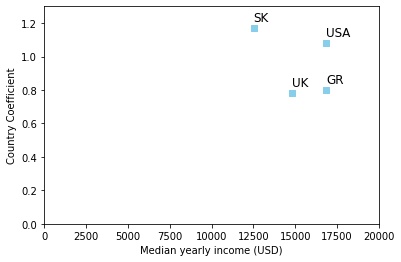

R-Squared value is: 0.20820239954899022


In [91]:
def plot_inc_cm(income, coefficients, countries):
    for country in range(len(countries)):
        x = income[country]
        y = coefficients[country]
        plt.scatter(x, y, marker = 's', color="skyblue")
        plt.text(x+0.04, y+0.04, countries[country], fontsize=12)
        plt.xlim(0, 20000)
        plt.ylim(0, 1.3)
        plt.xlabel('Median yearly income (USD)')
        plt.ylabel('Country Coefficient')
    c_matrix = np.corrcoef(income, coefficients)
    c_xy = c_matrix[0,1]
    r_squared = c_xy**2
    plt.show()
    print("R-Squared value is:", r_squared)
    
plot_inc_cm(median_income, country_multipliers, countries)

## Correlating rent


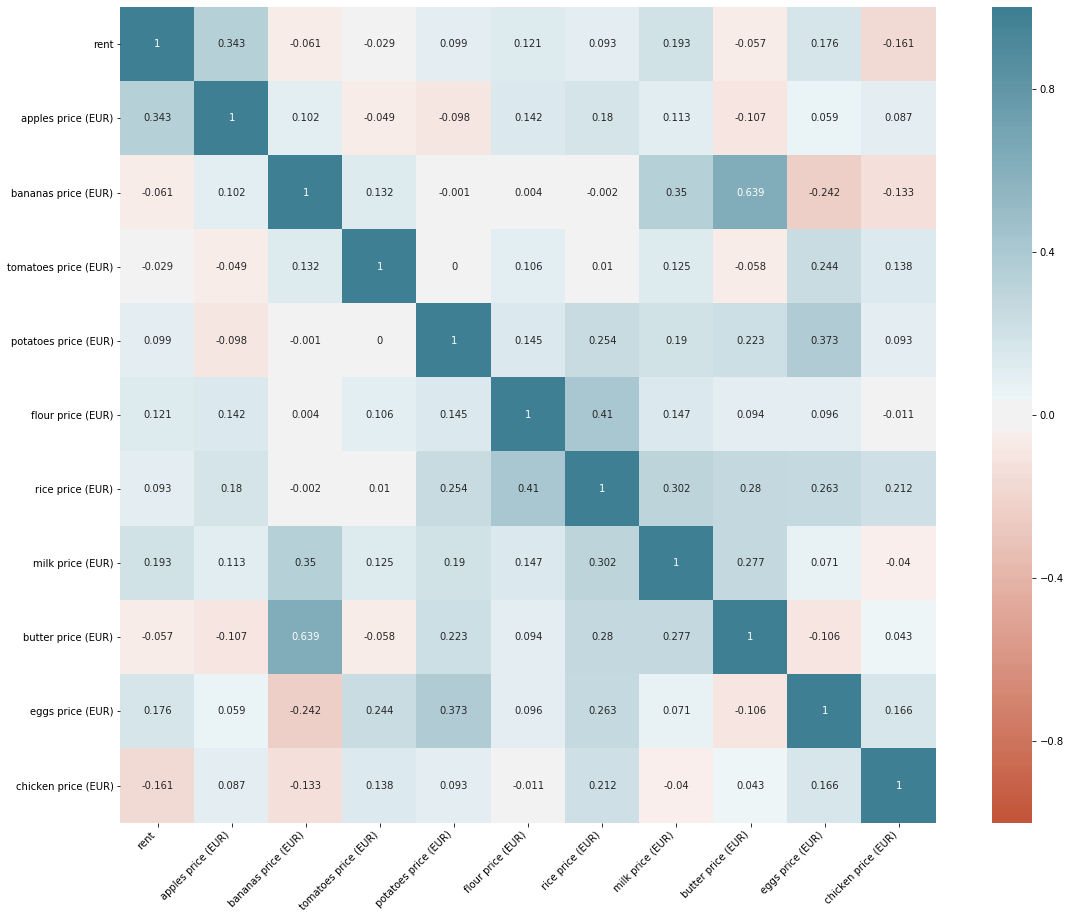

In [92]:
import seaborn as sns

corr_data = dataset.copy()
for i, j in zip(range(3, len(corr_data.columns)), range(len(products))):
    corr_data = corr_data.rename(columns = {corr_data.columns[i]: products[j]+" price (EUR)"})
corr_table = corr_data.corr().round(3)

plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_table, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, fmt='g')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax

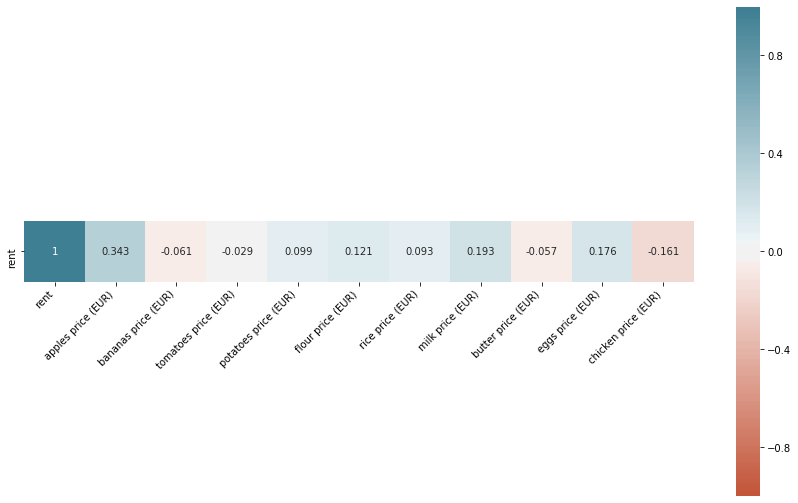

In [93]:
plt.subplots(figsize=(15, 9))
ax = sns.heatmap(corr_table[0:1], vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, fmt='g')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax

In [94]:
dataset['average_all'] = (dataset[dataset.columns[3]]+dataset[dataset.columns[4]]+dataset[dataset.columns[5]]+dataset[dataset.columns[6]]+dataset[dataset.columns[7]]+dataset[dataset.columns[8]]+dataset[dataset.columns[9]]+dataset[dataset.columns[10]]+dataset[dataset.columns[11]]+dataset[dataset.columns[12]])/10

In [95]:
data_upd = [dataset['rent'], dataset['average_all']]
headers = ["rent", "average_all"]
dataset_upd = pd.concat(data_upd, axis=1, keys=headers)

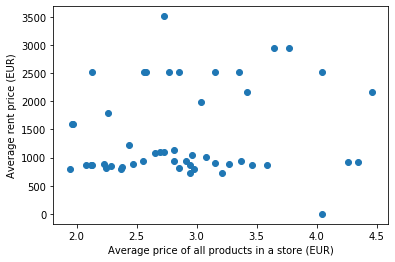

R-Squared value is: 0.015394650218646057


In [105]:
plt.scatter(dataset_upd['average_all'], dataset_upd['rent'])
plt.ylabel("Average rent price (EUR)")
plt.xlabel("Average price of all products in a store (EUR)")
plt.show()

corr = np.corrcoef(dataset['average_all'], dataset['rent'])
corr_xy = corr[0,1]
r_squared = corr_xy**2
print("R-Squared value is:", r_squared)